## Cool Star Lab, UCSD   
## Joman, 12 July, 2022  
---

In [12]:
pwd

'D:\\PythonCodes\\JupyterWorkspace\\AsteroidClassification'

### imports 

In [98]:
import splat as sp
from splat.plot import plotSpectrum

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import os.path
from scipy import stats as scipy
import math

from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch

from astropy.io import fits
from astropy.io import ascii # we'll use this to upload files
import astropy.units as u # units
from astropy.coordinates import SkyCoord # astropy coordinate object
from astropy.table import Table

### Vars

In [130]:
TEMPLATE_NAMES = {}
TEMPLATE_SPECS = {}
TEMPLATE_DICT = {}

In [121]:
template_dir = 'D:\\PythonCodes/JupyterWorkspace/Demeo_et_al_2009_Folder/fits'
class_names = np.array(sorted(f.split('.fits')[:len(f.split('.'))-1][0] for f in os.listdir(template_dir) if f != '.ipynb_checkpoints'))
class_names  # array of strings

array(['Demeo_et_al_2009_A', 'Demeo_et_al_2009_B', 'Demeo_et_al_2009_C',
       'Demeo_et_al_2009_Cb', 'Demeo_et_al_2009_Cg',
       'Demeo_et_al_2009_Cgh', 'Demeo_et_al_2009_Ch',
       'Demeo_et_al_2009_D', 'Demeo_et_al_2009_K', 'Demeo_et_al_2009_L',
       'Demeo_et_al_2009_O', 'Demeo_et_al_2009_Q', 'Demeo_et_al_2009_R',
       'Demeo_et_al_2009_S', 'Demeo_et_al_2009_Sa', 'Demeo_et_al_2009_Sq',
       'Demeo_et_al_2009_Sr', 'Demeo_et_al_2009_Sv', 'Demeo_et_al_2009_T',
       'Demeo_et_al_2009_V', 'Demeo_et_al_2009_X', 'Demeo_et_al_2009_Xc',
       'Demeo_et_al_2009_Xe', 'Demeo_et_al_2009_Xk'], dtype='<U20')

### Functions

In [131]:
def saveTemplate(name:str, template_names:np.array):
    TEMPLATE_NAMES[name] = template_names
    temp = []
    for item in template_names:
        sp = splat.Spectrum(filename= template_dir + '/' + item + '.fits')
        temp.append(sp)
    TEMPLATE_SPECS[name] = temp
    TEMPLATE_DICT[name] = (template_names,temp)

In [195]:
def simpleClassify(spx, name):
    temp_list =[]
    for tp_spec in TEMPLATE_DICT.get(name)[1]:
        temp_list.append(sp.compareSpectra(spx, tp_spec))
    results = np.array(temp_list)
    index_of_best_fit = np.where(results[:,0] == results[:,0].min())
    return results, TEMPLATE_DICT.get(name)[0][index_of_best_fit]

___

In [132]:
saveTemplate('demeo',class_names)

In [134]:
TEMPLATE_NAMES, TEMPLATE_SPECS, TEMPLATE_DICT

({'demeo': array(['Demeo_et_al_2009_A', 'Demeo_et_al_2009_B', 'Demeo_et_al_2009_C',
         'Demeo_et_al_2009_Cb', 'Demeo_et_al_2009_Cg',
         'Demeo_et_al_2009_Cgh', 'Demeo_et_al_2009_Ch',
         'Demeo_et_al_2009_D', 'Demeo_et_al_2009_K', 'Demeo_et_al_2009_L',
         'Demeo_et_al_2009_O', 'Demeo_et_al_2009_Q', 'Demeo_et_al_2009_R',
         'Demeo_et_al_2009_S', 'Demeo_et_al_2009_Sa', 'Demeo_et_al_2009_Sq',
         'Demeo_et_al_2009_Sr', 'Demeo_et_al_2009_Sv', 'Demeo_et_al_2009_T',
         'Demeo_et_al_2009_V', 'Demeo_et_al_2009_X', 'Demeo_et_al_2009_Xc',
         'Demeo_et_al_2009_Xe', 'Demeo_et_al_2009_Xk'], dtype='<U20')},
 {'demeo': [ spectrum of Demeo_et_al_2009_A.fits,
    spectrum of Demeo_et_al_2009_B.fits,
    spectrum of Demeo_et_al_2009_C.fits,
    spectrum of Demeo_et_al_2009_Cb.fits,
    spectrum of Demeo_et_al_2009_Cg.fits,
    spectrum of Demeo_et_al_2009_Cgh.fits,
    spectrum of Demeo_et_al_2009_Ch.fits,
    spectrum of Demeo_et_al_2009_D.fits,
    spectru

In [158]:
test_spec = sp.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

In [260]:
simpleClassify(test_spec, 'demeo')

(array([[9.64392029e+05, 3.41391735e-01],
        [1.53355999e+05, 5.66824795e-01],
        [9.83573354e+04, 4.93943905e-01],
        [8.79274959e+04, 4.76860784e-01],
        [8.04005662e+04, 4.88515827e-01],
        [5.87819326e+04, 4.73114373e-01],
        [6.04088579e+04, 4.95468831e-01],
        [2.74009155e+05, 3.28445051e-01],
        [6.99112777e+04, 4.54974993e-01],
        [4.64863520e+04, 4.07910517e-01],
        [2.73531554e+05, 5.64556664e-01],
        [1.15263923e+05, 5.03972924e-01],
        [1.99764553e+05, 4.19609387e-01],
        [5.54018952e+04, 4.12081543e-01],
        [4.56687163e+05, 4.23167529e-01],
        [1.04083538e+05, 4.39893344e-01],
        [6.33115992e+04, 4.21097744e-01],
        [5.48279460e+04, 3.78762793e-01],
        [1.01495191e+05, 3.88420357e-01],
        [3.16903344e+05, 4.11678680e-01],
        [1.08015527e+05, 4.18985979e-01],
        [6.47884316e+04, 4.52913281e-01],
        [6.01885168e+04, 4.38624989e-01],
        [7.13263014e+04, 4.3659150

In [171]:
test_spec.normalize()

In [164]:
test_spec.fluxMax()

<Quantity 1. erg / (cm2 micron s)>

In [197]:
test_spec.flux

<Quantity [ 0.48710036,  0.4909426 ,  0.49559587,  0.51436144,  0.48706552,
            0.48467532,  0.48096344,  0.49595973,  0.5015724 ,  0.48834497,
            0.507384  ,  0.49645895,  0.50447685,  0.5127091 ,  0.4932041 ,
            0.503905  ,  0.50620365,  0.49635586,  0.5027908 ,  0.4950327 ,
            0.5081623 ,  0.5101337 ,  0.49349067,  0.52319396,  0.5133891 ,
            0.52085245,  0.510014  ,  0.5048839 ,  0.50627273,  0.52330583,
            0.5116363 ,  0.5222453 ,  0.52970105,  0.5131096 ,  0.51289123,
            0.51981336,  0.5187922 ,  0.50960493,  0.5168084 ,  0.513981  ,
            0.5209811 ,  0.51650333,  0.5155043 ,  0.51076674,  0.5202013 ,
            0.5123698 ,  0.49544463,  0.4941811 ,  0.51260084,  0.51575154,
            0.5225837 ,  0.5204584 ,  0.5137    ,  0.5132801 ,  0.5106778 ,
            0.51121515,  0.50158554,  0.51109886,  0.5021013 ,  0.50202554,
            0.5069399 ,  0.50072706,  0.5012985 ,  0.504162  ,  0.49973887,
            

In the above cell, we see a normalized spectrum with a flux value > 1.

In [205]:
sp2 = sp.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_216Kleopatra-2_20010501.fits')

#### Gross compare

In [252]:
objs_dir = 'D:\\PythonCodes/JupyterWorkspace/SpeX_asteroid_spectra'
obj_names = np.array(sorted(f.split('.fits')[:len(f.split('.'))-1][0] for f in os.listdir(objs_dir) if f != '.ipynb_checkpoints'))
obj_names  # array of strings

array(['spex-prism_1036Ganymed_20010322',
       'spex-prism_1036Ganymed_20010502',
       'spex-prism_110Lydia-1_20010502',
       'spex-prism_110Lydia-2-2_20010501',
       'spex-prism_110Lydia-2_20010501', 'spex-prism_110Lydia-2_20010502',
       'spex-prism_110Lydia-3_20010501', 'spex-prism_110Lydia-3_20010502',
       'spex-prism_110Lydia-4_20010502', 'spex-prism_110Lydia_20010501',
       'spex-prism_19356_20010501', 'spex-prism_1998SF36_20010322',
       'spex-prism_2000SS164_20010129', 'spex-prism_2000XG47_20010501',
       'spex-prism_201Penelope-1_20010502',
       'spex-prism_201Penelope-2_20010501',
       'spex-prism_201Penelope-2_20010502',
       'spex-prism_201Penelope-3-1_20010502',
       'spex-prism_201Penelope-3-2_20010502',
       'spex-prism_201Penelope-3_20010501',
       'spex-prism_201Penelope-4_20010501',
       'spex-prism_201Penelope-4_20010502',
       'spex-prism_201Penelope-5-2_20010502',
       'spex-prism_201Penelope-5.1_20010502',
       'spex-prism_20

In [278]:
d = {}
name_list = []
results_list = []

In [279]:
for item in obj_names:
    name_list.append(item)
    temp_spec = sp.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\SpeX_asteroid_spectra/' + item +'.fits')
    results_list.append(simpleClassify(temp_spec, 'demeo')[1])

d['Objects'] = name_list
d['Simple Classifiy'] = results_list

In [287]:
demeo_results = ['S', 'S', 'Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Sq','--','--','--','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xe','Xe','Xe',
                '--', 'Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Sr','V','V','--', 'Sw','Sw','Sq','--','--','--','S','K','Sw','Xk','--']
d['Demeo Results'] = demeo_results

In [288]:
df = pd.DataFrame(data=d)
df

,Objects,Simple Classifiy,Demeo Results
0,spex-prism_1036Ganymed_20010322,[Demeo_et_al_2009_L],S
1,spex-prism_1036Ganymed_20010502,[Demeo_et_al_2009_Sv],S
2,spex-prism_110Lydia-1_20010502,[Demeo_et_al_2009_X],Xk
3,spex-prism_110Lydia-2-2_20010501,[Demeo_et_al_2009_X],Xk
4,spex-prism_110Lydia-2_20010501,[Demeo_et_al_2009_X],Xk
5,spex-prism_110Lydia-2_20010502,[Demeo_et_al_2009_Xk],Xk
6,spex-prism_110Lydia-3_20010501,[Demeo_et_al_2009_X],Xk
7,spex-prism_110Lydia-3_20010502,[Demeo_et_al_2009_Xk],Xk
8,spex-prism_110Lydia-4_20010502,[Demeo_et_al_2009_Xk],Xk
9,spex-prism_110Lydia_20010501,[Demeo_et_al_2009_T],Xk


___

From this small sample group, **10/47** spectra fits were categorized the same as published in Demeo 2009.  
simpleCompare often reach classifications of the same complex, but a different sub-class. (**20/47**)  
There also seems to be difficulty in classifying classes when slope is the main determiner. Classes of similar shape, but different depth/width of absorption even across complexes and when absoprtion features are lacking appear to have tricked simpleCompare.  
Correct and close $\rightarrow$ 30/47 = 63.8%    
Mistaken Identity $\rightarrow$ 17/47 = 36.2%


simpleCompare could be good, but not reliable and rigorous. 
___

### IR only, as an "an intermediate tool to indicate classes"

For **C** and **X** in IR, we expect to see these two types occupy the same space in PCA as distinguishing features are in the visible range.    
Author notes "**L-type** objects may be mixed in with our definition of **Sv- and R-types** because they do not fully separate in all cases."    
**Cg, Cgh, Xc, Xe**, and **Xk** objects requires visible wavelength   
That leaves us with **D, K, L, O, Q, R, S, Sa, Sq, Sr, Sv, T, V**

End members: D, K, L, T, A, O, Q, R V
In Demeo 2009, the team began with End Members first.

#### S Complex - example 1036Ganymed (S), simpleClassify => L
Appear to coincide with Demeo's observation   
J: dip near 1 micron could be key to ID S complexes vs some End Members  
Careful as S complex appear similar in IR  
Slope could become distinguishing factor (e.g. Sa and S share similar absorption features, but Sa has greater slope in 1-1.5 $\mu m$).  
*Consider removing noisy region > 2.50 $\mu m$, may help?* --> still categorized as L

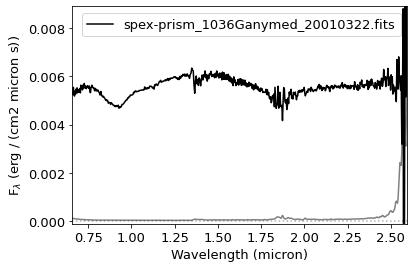

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [216]:
spS = sp.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')
spS.plot()

In [245]:
splat.Spectrum.trim?

Signature: splat.Spectrum.trim(self, rng, **kwargs)
Docstring:
:Purpose: 
    Trims a spectrum to be within a certain wavelength range or set of ranges. 
    Data outside of these ranges are excised from the wave, flux and noise arrays. 
    The full spectrum can be restored with the reset() procedure.

:Required Inputs: 

    :param range: the range(s) over which the spectrum is retained - a series of nested 2-element arrays

:Optional Inputs: 

    None

:Example:
   >>> import splat
   >>> sp = splat.getSpectrum(lucky=True)[0]
   >>> sp.smoothfluxMax()
   <Quantity 1.0577336634332284e-14 erg / (cm2 micron s)>
   >>> sp.computeSN()
   124.5198
   >>> sp.scale(1.e15)
   >>> sp.fluxMax()
   <Quantity 1.0577336549758911 erg / (cm2 micron s)>
   >>> sp.computeSN()
   124.51981
File:      d:\pythoncodes\splat\splat\core.py
Type:      function


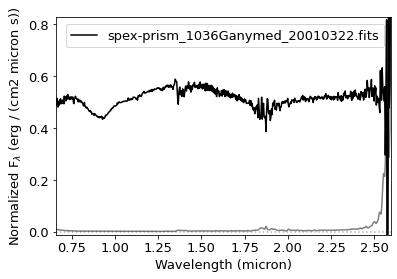

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [222]:
spS_copy = spS
spS_copy.normalize()
spS_copy.plot()

In [225]:
troubleShoot = fits.open('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

In [232]:
tblshoot = fits.getdata('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

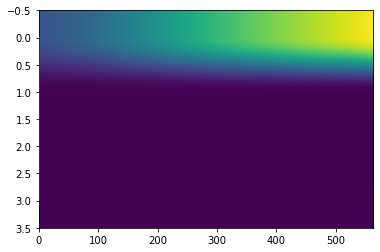

In [244]:
plt.imshow(tblshoot, aspect='auto')

In [249]:
spS_copy.trim([0.6,2.5])

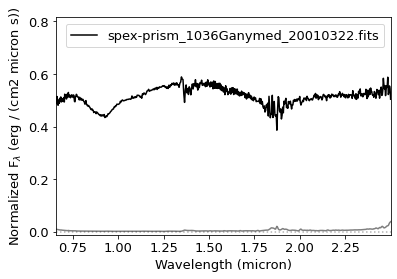

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [250]:
spS_copy.plot()

In [289]:
simpleClassify(spS_copy, 'demeo')[1]

array(['Demeo_et_al_2009_L'], dtype='<U20')

In [312]:
f1wave, f1flux, f1sig, f1avg = np.transpose(np.genfromtxt('D:\\PythonCodes\\JupyterWorkspace\\MITHNEOS_data/sp291/a022099.sp291.txt'))

In [304]:
# sp3 = sp.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\MITHNEOS_data/sp291/a022099.sp291.txt')

In [313]:
f1wave, f1flux, f1sig, f1avg

(array([0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675, 0.68 , 0.685, 0.69 ,
        0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 , 0.725, 0.73 , 0.735,
        0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765, 0.77 , 0.775, 0.78 ,
        0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 , 0.815, 0.82 , 0.825,
        0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855, 0.86 , 0.865, 0.87 ,
        0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  , 0.905, 0.91 , 0.915,
        0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945, 0.95 , 0.955, 0.96 ,
        0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 , 0.995, 1.   , 1.005,
        1.01 , 1.015, 1.02 , 1.025, 1.03 , 1.035, 1.04 , 1.045, 1.05 ,
        1.055, 1.06 , 1.065, 1.07 , 1.075, 1.08 , 1.085, 1.09 , 1.095,
        1.1  , 1.105, 1.11 , 1.115, 1.12 , 1.125, 1.13 , 1.135, 1.14 ,
        1.145, 1.15 , 1.155, 1.16 , 1.165, 1.17 , 1.175, 1.18 , 1.185,
        1.19 , 1.195, 1.2  , 1.205, 1.21 , 1.215, 1.22 , 1.225, 1.23 ,
        1.235, 1.24 , 1.245, 1.25 , 1.255, 1.26 , 1.265, 1.27 , 1.275,
      

In [307]:
f2 = (np.genfromtxt('D:\\PythonCodes\\JupyterWorkspace\\MITHNEOS_data/sp291/a022099.sp291.txt'))

In [311]:
f2[0]

array([ 0.65, -1.  , -1.  ,  0.  ])

Attempting PCA below 
1) map different data on properties/variables as points
    - First principal axis (PA) $\rightarrow$ max(variance)
    - 2nd PA $\rightarrow$ $PA_2 \perp PA_1$
   
in paper, helpful to see decision tree in apx B.

##### Old Functions
---

In [ ]:
#############
# functions #
#############

def saveTemplate(directory: str, saveName: str, classNames): #need revision, update: 'one step' is working
#     if not delim: #defaults separation to one space
#         delim = ' '
    
    saveFolderName = saveName + '_Folder'
    
    #check if save location already existed (e.g. from previous calls)
    if os.path.isdir(saveFolderName) == False: os.makedirs(saveFolderName)
    if os.path.isdir(saveFolderName+'\\csv') == False: 
        os.makedirs(saveFolderName+'\\csv')
        os.makedirs(saveFolderName+'\\fits')
    
    temp = pd.read_csv(directory, sep=' ', header=None, index_col=0) #uses col 0 for index
    temp.index.name = 'Wave' #dataframe with colomns Wave, and 2 other unnamed colomns
    n = 0
    tempDict ={}
    for j in classNames:
        tempDict[j] = temp.iloc[:,[n, n+1]].rename(columns={n+1: 'Flux', n+2: 'Noise'})#.index.names = ['wave']
        tempDict.get(j).to_csv(path_or_buf = saveFolderName+'\\csv\\' + saveName + '_' + j + '.csv' ,sep=',')
        print(type(tempDict.get(j)))
        splat.Spectrum(saveFolderName+'\\csv\\'+saveName+'_'+j+'.csv').save(saveFolderName+'\\fits\\'+saveName+'_'+j+'.fits')  
        n += 2


def slopeless(inSpec: splat.Spectrum, slope = 0):
    x = inSpec.wave.value
    y = inSpec.flux.value
    dy = inSpec.noise.value
    
    m,b = np.polyfit(x,y, 1) # returns m, b in y = mx + b, then use this with each value of fpx.wave as x to calculate line
    
    fitArray = np.empty_like(y, dtype=float)
    n = 0
    for val in x:
        fitArray[n] = m*val+b
        n+=1

    tDict = {}
    tDict['wave'] = x
    tDict['flux'] = np.divide(y, fitArray)
    tDict['noise'] = np.divide(dy, fitArray)
    outSpec = splat.Spectrum(tDict)
    outSpec.name =  inSpec.name + '_Slopeless'
    
    return outSpec

    
def classifyAsteroid(sp1, scheme, *output, slope=True, folder=False, **kwargs):
    """
    :Purpose: 
    
        Categorize input spectra to a specific available classification scheme.
    
    :Required Inputs:
    
        :Param sp1: a single splat.Spectrum
        :Param scheme: a dictionary of template spectra from that scheme
        
    :Optional Inputs:
        
        :Param showAll: boolean, True: shows the fit scores for all the templates.
        :Param plot: boolean, True (default): shows plot of sp1 vs the best template fit determined.
        :Param save: boolean, True: saves comparison plot as <sp1 name>_<scheme name>_<class name>.pdf #yet to be implemented
        :Param slope: boolean, True(default): slope=False to remove slope during comparison.
        
    :Output:
        
        Name of the spectral class and the corresponding fit score.
        
    """
    if(kwargs.get('plot') == None):
        kwargs['plot'] = True
    
    fitScores = {}
    ranges = [0.85, 2.45]

    if(slope == False):
        slopelessScheme = {}
        for key, template in scheme.items():
            slopelessScheme[key] = slopeless(template)
        sp1 = slopeless(sp1)
        scheme = slopelessScheme
        
    for key, template in scheme.items():
            fitScores[key] = splat.compareSpectra(sp1, template, fit_ranges=ranges, mask_telluric=True, novar2=True)[0]
    
    bestFitName = min(fitScores, key=fitScores.get)
    
#     if(kwargs.get('plot') and slope==False):
#         splat.compareSpectra(sp1, scheme.get(bestFitName), fit_ranges=ranges, mask_telluric=True, plot=True, novar2=True)
#     # elif(kwargs.get('save')):
    
    if(kwargs.get('plot')):
        splat.compareSpectra(sp1, scheme.get(bestFitName), fit_ranges=ranges, mask_telluric=True, novar2=True, plot=True)

    if(kwargs.get('showAll')):
        return bestFitName, fitScores.get(bestFitName), fitScores
    else:
        return bestFitName, fitScores.get(bestFitName)
